In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('../Dataset/dataset_1.csv')
data2 = pd.read_csv('../Dataset/dataset_2.csv')

In [3]:
data1.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
data2.head()

,url,url_length,hostname_length,ip,total_of.,total_of-,total_of@,total_of?,total_of&,total_of=,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,...,1,1,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,...,1,0,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,...,1,0,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,...,1,1,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidr1.com/,28,19,0,2,0,0,0,0,0,...,0,0,0,164,1662,312044,0,0,4,legitimate


In [5]:
# 1. qty_dot_url (Dataset 1) - total_of. (Dataset 2)
# 2. qty_hyphen_url (Dataset 1) - total_of- (Dataset 2)
# 3. qty_underline_url (Dataset 1) - total_of_ (Dataset 2)
# 4. qty_slash_url (Dataset 1) - total_of/ (Dataset 2)
# 5. qty_questionmark_url (Dataset 1) - total_of? (Dataset 2)
# 6. qty_equal_url (Dataset 1) - total_of= (Dataset 2)
# 7. qty_at_url (Dataset 1) - total_of@ (Dataset 2)
# 8. qty_and_url (Dataset 1) - total_of& (Dataset 2)
# 9. qty_tilde_url (Dataset 1) - total_of~ (Dataset 2)
# 10. qty_comma_url (Dataset 1) - total_of, (Dataset 2)
# 11. qty_asterisk_url (Dataset 1) - total_of* (Dataset 2)
# 12. qty_percent_url (Dataset 1) - total_of% (Dataset 2)
# 13. qty_dollar_url (Dataset 1) - total_of$ (Dataset 2)
# 14. url_google_index (Dataset 1) - google_index (Dataset 2)
# 15. tld_present_params (Dataset 1) - tld_in_path (Dataset 2)
# 16. qty_redirects (Dataset 1) - nb_redirection (Dataset 2)
# 17. length_url (Dataset 1) - url_length (Dataset 2)
# 18. url_shortened (Dataset 1) - shortening_service (Dataset 2)
# 19. domain_length (Dataset 1) - hostname_length (Dataset 2)
# 20. domain_in_ip (Dataset 1) - ip (Dataset 2)

In [6]:
data1 = data1[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_tilde_url', 'qty_comma_url', 'qty_asterisk_url', 'qty_percent_url', 'qty_dollar_url', 'url_google_index', 'tld_present_params', 'qty_redirects', 'length_url', 'url_shortened', 'domain_length', 'domain_in_ip', 'phishing']]

In [7]:
len(data1.columns)

21

In [8]:
data2 = data2[['total_of.', 'total_of-', 'total_of_', 'total_of/', 'total_of?', 'total_of=', 'total_of@', 'total_of&', 'total_of~', 'total_of,', 'total_of*', 'total_of%', 'total_of$', 'google_index', 'tld_in_path', 'nb_redirection', 'url_length', 'shortening_service', 'hostname_length', 'ip', 'status']]

In [9]:
len(data2.columns)

21

In [10]:
data2['status'] = data2['status'].map({'phishing':1,'legitimate':0})

In [11]:
x = data1['url_google_index'].to_list()
for i in range(len(x)):
    if x[i]<0:
        x[i]=0
data1['url_google_index'] = x

In [12]:
x = data1['tld_present_params'].to_list()
for i in range(len(x)):
    if x[i]<0:
        x[i]=0
data1['tld_present_params'] = x

In [13]:
x = data1['qty_redirects'].to_list()
for i in range(len(x)):
    if x[i]<0:
        x[i]=0
data1['qty_redirects'] = x

In [14]:
def column_statistics(df):
    # Calculate descriptive statistics
    desc_stats = df.describe().T
    
    # Calculate additional statistics
    median = df.median()
    mode = df.mode().iloc[0]
    min_values = df.min()
    max_values = df.max()
    mean_values = df.mean()
    std_values = df.std()
    percentiles = df.quantile([0.25, 0.5, 0.75]).T
    
    # Add median and mode to descriptive statistics
    desc_stats['median'] = median
    desc_stats['mode'] = mode
    desc_stats['25%'] = percentiles[0.25]
    desc_stats['50%'] = percentiles[0.5]
    desc_stats['75%'] = percentiles[0.75]
    
    # Rearrange columns to desired order
    desc_stats = desc_stats[['min', 'max', 'mean', 'std']]#, 'median', 'mode', '25%', '50%', '75%']]
    
    return desc_stats

In [15]:
a = column_statistics(data1[data1['phishing']==1])

In [16]:
b = column_statistics(data2[data2['status']==1])

In [17]:
c = column_statistics(data1[data1['phishing']==0])

In [18]:
d = column_statistics(data2[data2['status']==0])

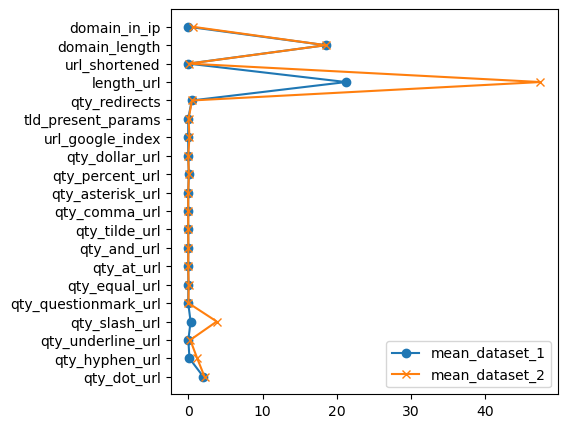

In [19]:
plt.figure(figsize=(5,5))

plt.plot(c['mean'][:-1], data1.columns[:-1], marker='o')
plt.plot(d['mean'][:-1], data1.columns[:-1], marker='x')


# plt.plot(c['min'][:-1], data1.columns[:-1], marker='o')
# plt.plot(d['min'][:-1], data1.columns[:-1], marker='x')

# plt.plot(c['max'][:-1], data1.columns[:-1], marker='o')
# plt.plot(d['max'][:-1], data1.columns[:-1], marker='x')

# plt.plot(c['std'][:-1], data1.columns[:-1], marker='o')
# plt.plot(d['std'][:-1], data1.columns[:-1], marker='x')
plt.legend(['mean_dataset_1', 'mean_dataset_2', "min_dataset_1", "min_dataset_2", "max_dataset_1", "max_dataset_2", 'std_dataset_1', 'std_dataset_2'], loc="lower right")
plt.show()

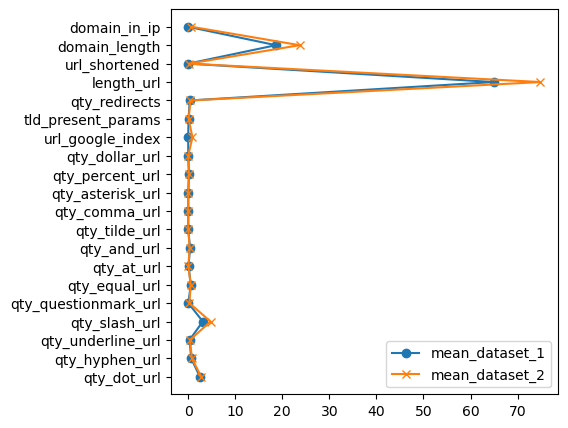

In [20]:
plt.figure(figsize=(5,5))

plt.plot(a['mean'][:-1], data1.columns[:-1], marker='o')
plt.plot(b['mean'][:-1], data1.columns[:-1], marker='x')
# plt.plot(a['min'][:-1], data1.columns[:-1], marker='o')
# plt.plot(b['min'][:-1], data1.columns[:-1], marker='x')

# plt.plot(a['max'][:-1], data1.columns[:-1], marker='o')
# plt.plot(b['max'][:-1], data1.columns[:-1], marker='x')

# plt.plot(a['std'][:-1], data1.columns[:-1], marker='o')
# plt.plot(b['std'][:-1], data1.columns[:-1], marker='x')
plt.legend(['mean_dataset_1', 'mean_dataset_2', "min_dataset_1", "min_dataset_2", "max_dataset_1", "max_dataset_2", 'std_dataset_1', 'std_dataset_2'], loc="lower right")
plt.show()

In [21]:
print(data1['url_google_index'].value_counts())
print(data1['tld_present_params'].value_counts())
print(data1['url_shortened'].value_counts())
print(data1['domain_in_ip'].value_counts())

0    88432
1      215
Name: url_google_index, dtype: int64
0    86472
1     2175
Name: tld_present_params, dtype: int64
0    88161
1      486
Name: url_shortened, dtype: int64
0    88446
1      201
Name: domain_in_ip, dtype: int64


In [22]:
print(data2['google_index'].value_counts())
print(data2['tld_in_path'].value_counts())
print(data2['shortening_service'].value_counts())
print(data2['ip'].value_counts())

1    10376
0     9055
Name: google_index, dtype: int64
0    18158
1     1273
Name: tld_in_path, dtype: int64
0    17035
1     2396
Name: shortening_service, dtype: int64
1    12621
0     6810
Name: ip, dtype: int64
